In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

In [2]:
df = pd.read_csv(r"C:\Users\DHONI HANIF\OneDrive\Documents\AI_Collection_and_Loss_Reverse_Forecast\modelling\kolektor\regresi_for_total_cost\data\data2.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1000 non-null   int64  
 1   avg_bill_methods          1000 non-null   object 
 2   debtor_volume_handled     1000 non-null   int64  
 3   bill_amount_collected     1000 non-null   int64  
 4   total_actual              1000 non-null   int64  
 5   total_cost                1000 non-null   int64  
 6   success_rate              1000 non-null   float64
 7   time_to_collect           1000 non-null   int64  
 8   collector_gender          1000 non-null   object 
 9   collector_marital_status  1000 non-null   object 
 10  collector_age             1000 non-null   int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 86.1+ KB


In [3]:
for i in df.columns:
    if df[i].dtype == "object":
        df[i] = df[i].astype("category")

df.drop(["Unnamed: 0"], axis=1, inplace=True)

In [4]:
df.head()

,avg_bill_methods,debtor_volume_handled,bill_amount_collected,total_actual,total_cost,success_rate,time_to_collect,collector_gender,collector_marital_status,collector_age
0,sms or WA,10,61600000,67200000,72549,92.0,0,laki-laki,Menikah,45
1,sms or WA,15,32800000,140200000,86235,23.0,3,perempuan,Cerai mati,32
2,sms or WA,10,38400000,55300000,99363,69.0,1,laki-laki,Cerai hidup,62
3,sms or WA,9,32500000,57400000,76118,57.0,1,perempuan,Cerai mati,55
4,sms or WA,6,21000000,25400000,61461,83.0,4,perempuan,Menikah,53


In [5]:
df["avg_bill_methods"].value_counts()

avg_bill_methods
sms or WA           300
panggilan           250
surat panggilan     250
datang ke tempat    200
Name: count, dtype: int64

In [6]:
bill_methods = LabelEncoder().fit(df["avg_bill_methods"].to_numpy().reshape(-1, 1))
gender = LabelEncoder().fit(df["collector_gender"].to_numpy().reshape(-1, 1))
mart = LabelEncoder().fit(df["collector_marital_status"].to_numpy().reshape(-1, 1))
df2 = pd.DataFrame()

df2["avg_bill_methods"] = bill_methods.transform(df["avg_bill_methods"])
df2["collector_gender"] = gender.transform(df["collector_gender"])
df2["collector_marital_status"] = mart.transform(df["collector_marital_status"])
           
scaler = RobustScaler().fit(df[["bill_amount_collected", "total_actual", "total_cost", "debtor_volume_handled", "collector_age", "success_rate"]])
df2[["bill_amount_collected", "total_actual", "total_cost", "debtor_volume_handled", "collector_age", "success_rate"]] = scaler.transform(df[["bill_amount_collected", "total_actual", "total_cost", "debtor_volume_handled", "collector_age", "success_rate"]])
y = df["time_to_collect"]
df2.head(5)

c:\Users\DHONI HANIF\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\DHONI HANIF\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\DHONI HANIF\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,avg_bill_methods,collector_gender,collector_marital_status,bill_amount_collected,total_actual,total_cost,debtor_volume_handled,collector_age,success_rate
0,2,0,3,-0.192152,-0.347049,-0.358469,-0.814815,0.095238,0.739130
1,2,1,2,-0.329132,-0.181787,-0.348580,-0.629630,-0.523810,-0.760870
2,2,0,1,-0.302497,-0.373988,-0.339093,-0.814815,0.904762,0.239130
3,2,1,2,-0.330559,-0.369234,-0.355890,-0.851852,0.571429,-0.021739
4,2,1,3,-0.385256,-0.441678,-0.366482,-0.962963,0.476190,0.543478


In [7]:
X = df2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
model = KNeighborsRegressor()
model.fit(X_train, y_train)

KNeighborsRegressor()

In [8]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = mse ** (1/2)
r_square = r2_score(y_test, y_pred)

print(f"""
      Mean Squared Errror : {mse:.2f}
      Mean Absolute Error : {mae:.2f}
      Mean Absolute Percentage Error : {mape:.2f}
      Root Mean Squared Error : {rmse:.2f}
      R_Squared : {r_square:.2f}
      """)


      Mean Squared Errror : 6.37
      Mean Absolute Error : 1.75
      Mean Absolute Percentage Error : 270215977642230.00
      Root Mean Squared Error : 2.52
      R_Squared : 0.90
      


In [9]:
param_grid = {
    "n_neighbors": np.arange(1, 41),
    "weights": ["uniform", "distance"],
    "algorithm": ["auto", "ball_tree", "kd_tree", "brute"],
    "metric": ["cityblock", "cosine", "euclidean", "haversine", "l1", "l2", "manhattan", "minkowski"]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

c:\Users\DHONI HANIF\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\DHONI HANIF\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\DHONI HANIF\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\DHONI HANIF\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py", line 722, in score
    y_pred = self.predict(X)
  File "c:\Users\DHONI HANIF\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_regression.py", line 236, in predict
    neigh_ind = self.kneighbors(X, return_di

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'metric': ['cityblock', 'cosine', 'euclidean',
                                    'haversine', 'l1', 'l2', 'manhattan',
                                    'minkowski'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40]),
                         'weights': ['uniform', 'distance']})

In [10]:
model = grid_search.best_estimator_
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = mse ** (1/2)
r_square = r2_score(y_test, y_pred)

print(f"""
      Mean Squared Errror : {mse:.2f}
      Mean Absolute Error : {mae:.2f}
      Mean Absolute Percentage Error : {mape:.2f}
      Root Mean Squared Error : {rmse:.2f}
      R_Squared : {r_square:.2f}
      """)


      Mean Squared Errror : 5.34
      Mean Absolute Error : 1.64
      Mean Absolute Percentage Error : 265712378014859.53
      Root Mean Squared Error : 2.31
      R_Squared : 0.92
      


In [11]:
import pickle

pickle.dump(model, open("knn.pkl", "wb"))

In [12]:
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor

model2 = BaggingRegressor()
model2.fit(X_train, y_train)

BaggingRegressor()

In [13]:
y_pred = model2.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = mse ** (1/2)
r_square = r2_score(y_test, y_pred)

print(f"""
      Mean Squared Errror : {mse:.2f}
      Mean Absolute Error : {mae:.2f}
      Mean Absolute Percentage Error : {mape:.2f}
      Root Mean Squared Error : {rmse:.2f}
      R_Squared : {r_square:.2f}
      """)


      Mean Squared Errror : 5.98
      Mean Absolute Error : 1.75
      Mean Absolute Percentage Error : 270215977642229.97
      Root Mean Squared Error : 2.45
      R_Squared : 0.91
      


In [14]:
import pickle

pickle.dump(model, open("bagging.pkl", "wb"))

In [15]:
# Inisialisasi model Bagging Regressor
bagging_regressor = BaggingRegressor()

# Menentukan grid hyperparameter yang akan dijelajahi
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_samples': [0.5, 0.7, 0.9],
    'max_features': [0.5, 0.7, 0.9]
}

# Inisiasi GridSearchCV
grid_search = GridSearchCV(estimator=bagging_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Melakukan pencarian hyperparameter terbaik
grid_search.fit(X_train, y_train)

# Menampilkan hyperparameter terbaik
best_params = grid_search.best_params_
print("Hyperparameter terbaik:", best_params)

# Menampilkan skor terbaik
best_score = -grid_search.best_score_
print("Skor terbaik:", best_score)

Hyperparameter terbaik: {'max_features': 0.9, 'max_samples': 0.5, 'n_estimators': 100}
Skor terbaik: 5.801795874999999


In [16]:
model = grid_search.best_estimator_
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = mse ** (1/2)
r_square = r2_score(y_test, y_pred)

print(f"""
      Mean Squared Errror : {mse:.2f}
      Mean Absolute Error : {mae:.2f}
      Mean Absolute Percentage Error : {mape:.2f}
      Root Mean Squared Error : {rmse:.2f}
      R_Squared : {r_square:.2f}
      """)


      Mean Squared Errror : 4.89
      Mean Absolute Error : 1.62
      Mean Absolute Percentage Error : 258281438629698.16
      Root Mean Squared Error : 2.21
      R_Squared : 0.92
      


In [17]:
import pickle

pickle.dump(model, open("bagging2.pkl", "wb"))

In [18]:
model = AdaBoostRegressor()
model.fit(X_train, y_train)

AdaBoostRegressor()

In [19]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = mse ** (1/2)
r_square = r2_score(y_test, y_pred)

print(f"""
      Mean Squared Errror : {mse:.2f}
      Mean Absolute Error : {mae:.2f}
      Mean Absolute Percentage Error : {mape:.2f}
      Root Mean Squared Error : {rmse:.2f}
      R_Squared : {r_square:.2f}
      """)


      Mean Squared Errror : 4.76
      Mean Absolute Error : 1.61
      Mean Absolute Percentage Error : 253831453283605.91
      Root Mean Squared Error : 2.18
      R_Squared : 0.93
      


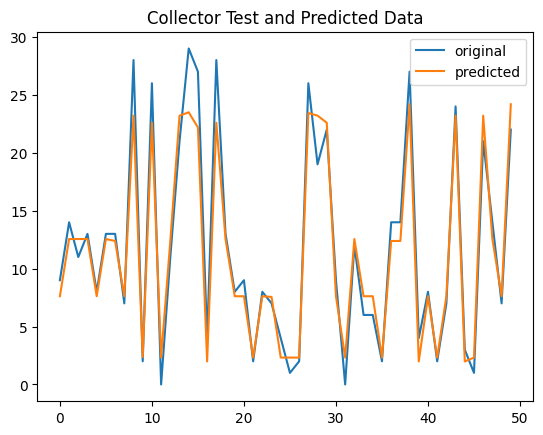

In [22]:
x_ax = range(len(y_test[:50]))
plt.plot(x_ax, y_test[:50], label="original")
plt.plot(x_ax, y_pred[:50], label="predicted")
plt.title("Collector Test and Predicted Data")
plt.legend()
plt.show()

In [20]:
import joblib
load_model = joblib.load('knn.pkl')

input_data = [x for x in X_test.iloc[-1]]
final_features = [np.array(input_data)]
result = load_model.predict(final_features)[0]
print(result, y_test.iloc[-1])

1.4666666666666666 2


c:\Users\DHONI HANIF\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


In [21]:
load_model = joblib.load('bagging2.pkl')

input_data = [x for x in X_test.iloc[-1]]
final_features = [np.array(input_data)]
result = load_model.predict(final_features)[0]
print(result, y_test.iloc[-1])

1.32 2


c:\Users\DHONI HANIF\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but BaggingRegressor was fitted with feature names
  warnings.warn(
